In [1]:
!pip install openpyxl xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 3.5 MB/s eta 0:00:00


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [83]:
summary_text = [
    "UEFA Champions League Dashboard",
    f"Author: Sonal I",
    f"Generated On: {datetime.date.today()}",
    "",
    "Overview:",
    "This report provides insights into UEFA Champions League history using data from multiple sources.",
    "It includes analysis of top clubs, player goal statistics and coaching appearances",
    "",
    "Key Insights:",
    "- Real Madrid leads with the most UCL titles and highest win percentage.",
    "- Cristiano Ronaldo and Lionel Messi dominate the top scorers list.",
    "- A small group of players account for a high percentage of total goals.",
    "- Coaches like Carlo Ancelotti have the highest appearance counts, highlighting sustained success.",
    "",
    "Tools Used:",
    "- Python (pandas, matplotlib)",
    "- Excel (via xlsxwriter)",
    "- Google Colab for automation and visualization"]

In [85]:
summary_df = pd.DataFrame({'Summary': summary_text})
df = pd.read_csv('AllTimeRankingByClub.csv',encoding='utf-16')
country_df = pd.read_csv('AllTimeRankingByCountry.csv', encoding='utf-8')
scorers_df = pd.read_csv('PlayerGoalTotals.csv', encoding='utf-8')
coaches_df = pd.read_csv('CoachesAppearTotals.csv',encoding='utf-8')
goals_df = pd.read_csv('PlayerGoalTotals.csv')
goals_df.head()

,Unnamed: 0,Player,Goals
0,0,Cristiano Ronaldo,140
1,1,Lionel Messi,129
2,2,Robert Lewandowski,91
3,3,Karim Benzema,90
4,4,Raúl González,71


In [72]:
top_clubs=df.sort_values(by='Titles',ascending=False).head(10)
top_countries = country_df.sort_values(by='Titles', ascending=False).head(10)
top_scorers = scorers_df.sort_values(by='Goals', ascending=False).head(10)
top_coaches = coaches_df.sort_values(by='Appearance', ascending=False).head(10)

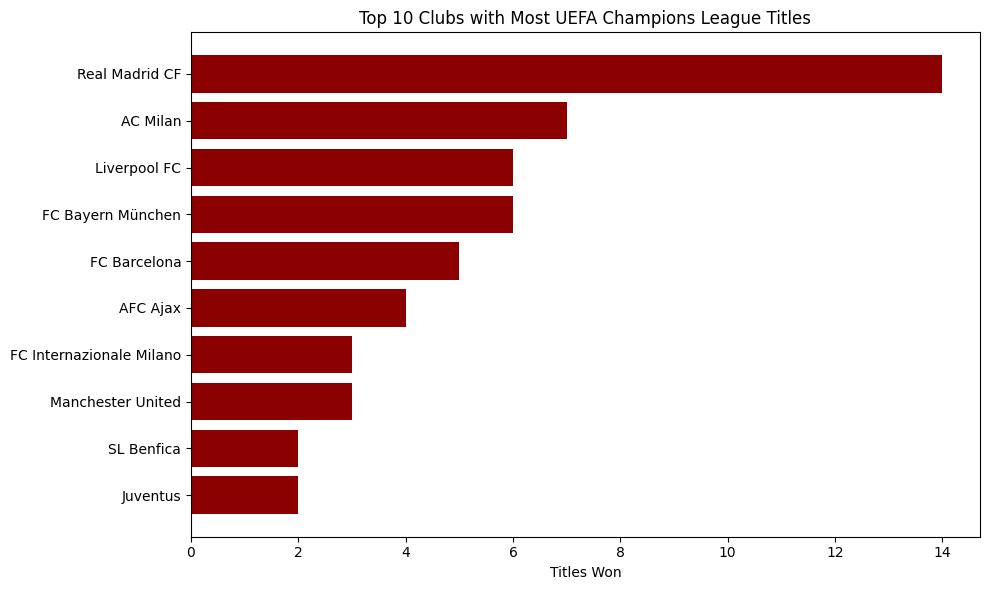

In [39]:
plt.figure(figsize=(10, 6))
plt.barh(top_clubs['Club'], top_clubs['Titles'], color='darkred')
plt.xlabel("Titles Won")
plt.title("Top 10 Clubs with Most UEFA Champions League Titles")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('chart_clubs_titles.png')
plt.show()

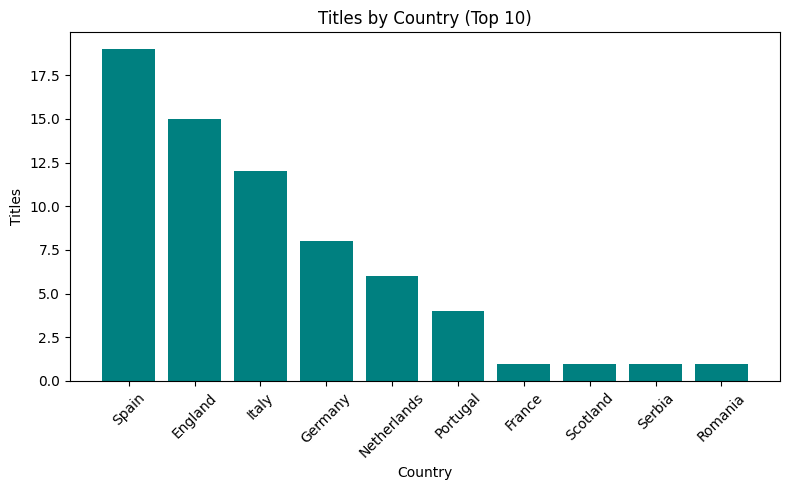

In [40]:
plt.figure(figsize=(8, 5))
plt.bar(top_countries['Country'], top_countries['Titles'], color='teal')
plt.title("Titles by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart_country_titles.png')
plt.show()

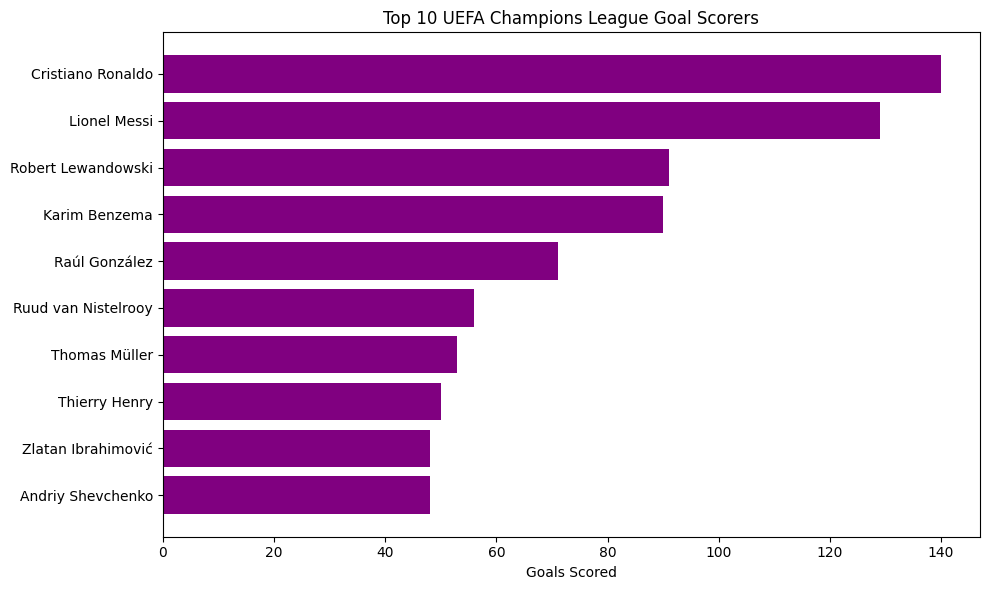

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(top_scorers['Player'], top_scorers['Goals'], color='purple')
plt.xlabel("Goals Scored")
plt.title("Top 10 UEFA Champions League Goal Scorers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('chart_top_scorers.png')
plt.show()

In [47]:
df['WinPercent'] = (df['Titles'] / df['Participated']) * 100
top_win_rate = df[df['Participated'] > 5].sort_values(by='WinPercent', ascending=False).head(10)

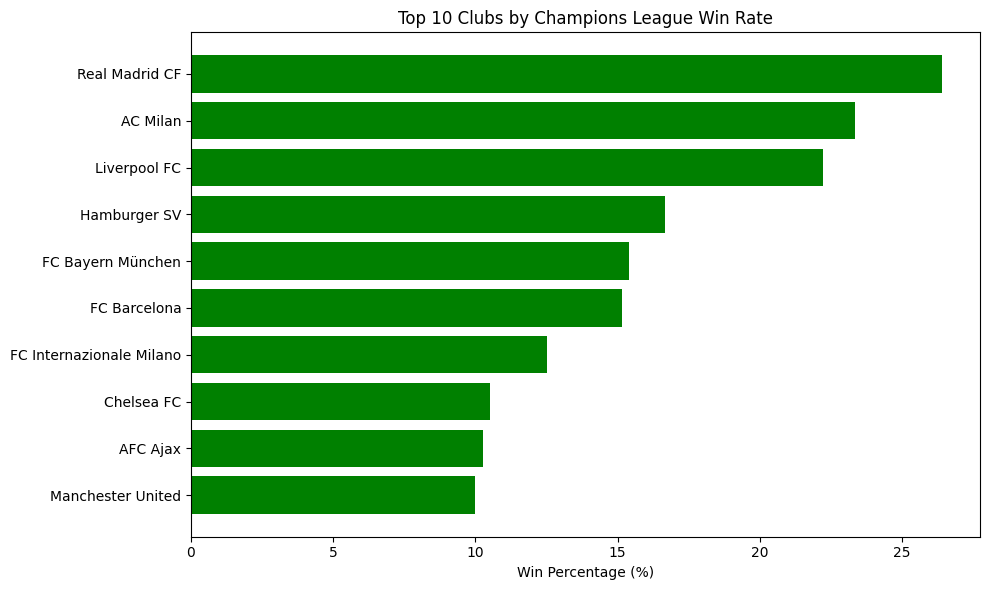

In [48]:
plt.figure(figsize=(10,6))
plt.barh(top_win_rate['Club'], top_win_rate['WinPercent'], color='green')
plt.xlabel("Win Percentage (%)")
plt.title("Top 10 Clubs by Champions League Win Rate")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('chart_club_winrate.png')
plt.show()

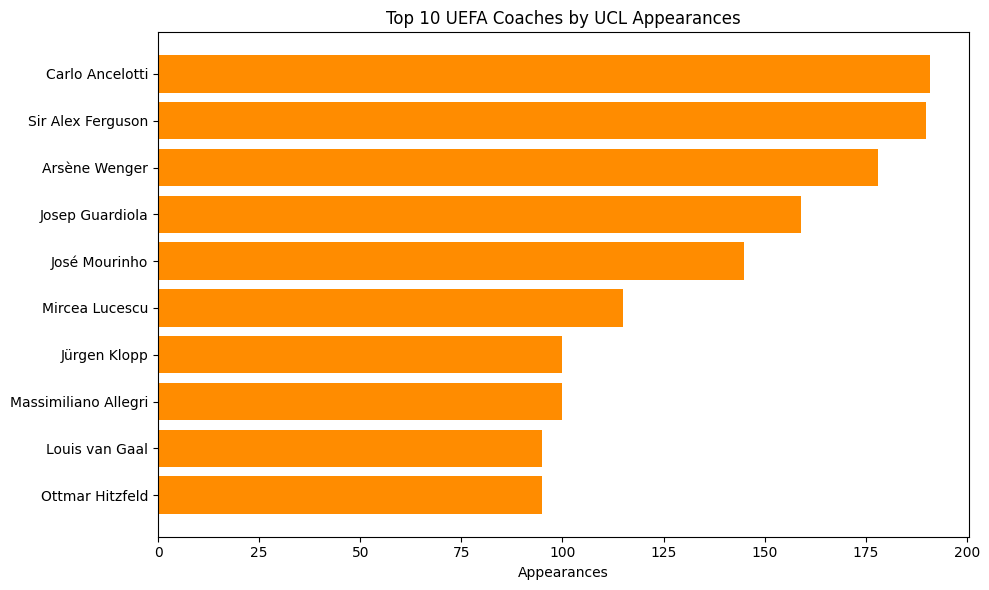

In [63]:
plt.figure(figsize=(10,6))
plt.barh(top_coaches['Coach'], top_coaches['Appearance'], color='darkorange')
plt.xlabel("Appearances")
plt.title("Top 10 UEFA Coaches by UCL Appearances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("chart_top_coaches_appearances.png")
plt.show()

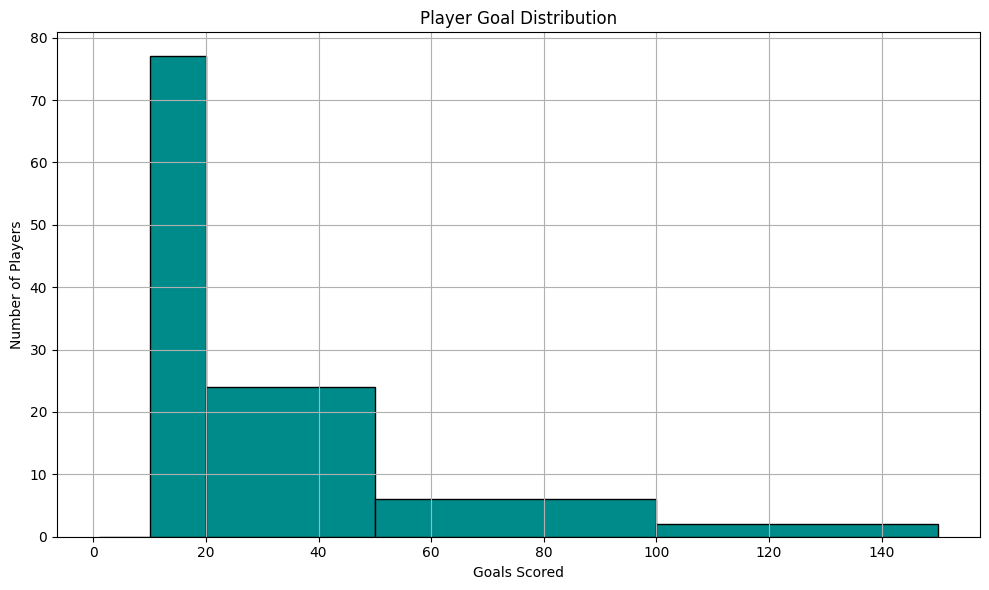

In [79]:
plt.figure(figsize=(10,6))
plt.hist(goals_df['Goals'], bins=[1, 5, 10, 20, 50, 100, 150], color='darkcyan', edgecolor='black')
plt.title("Player Goal Distribution")
plt.xlabel("Goals Scored")
plt.ylabel("Number of Players")
plt.grid(True)
plt.tight_layout()
plt.savefig("chart_goal_distribution.png")
plt.show()

In [89]:
with pd.ExcelWriter("UCL_Dashboard_Report.xlsx", engine='xlsxwriter') as writer:
    top_clubs.to_excel(writer, sheet_name="Top Clubs", index=False)
    top_countries.to_excel(writer, sheet_name="Country Titles", index=False)
    top_scorers.to_excel(writer, sheet_name="Top Scorers", index=False)
    top_win_rate.to_excel(writer, sheet_name="Club Win %", index=False)
    top_coaches.to_excel(writer, sheet_name="Top Coaches", index=False)
    goals_df.to_excel(writer, sheet_name="Player Goals", index=False)
    workbook  = writer.book
    summary_df.to_excel(writer, sheet_name="Summary", index=False)
    worksheet1 = writer.sheets["Top Clubs"]
    worksheet2 = writer.sheets["Country Titles"]
    worksheet3 = writer.sheets["Top Scorers"]
    worksheet4 = writer.sheets["Club Win %"]
    worksheet5 = writer.sheets["Top Coaches"]
    worksheet6= writer.sheets["Player Goals"]
    worksheet1.insert_image("H2", "chart_clubs_titles.png")
    worksheet2.insert_image("H2", "chart_country_titles.png")
    worksheet3.insert_image("H2", "chart_top_scorers.png")
    worksheet4.insert_image("H2", "chart_club_winrate.png")
    worksheet5.insert_image("H2", "chart_top_coaches_appearances.png")
    worksheet6.insert_image("H2", "chart_goal_distribution.png")

In [90]:
from google.colab import files
files.download("UCL_Dashboard_Report.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
from google.colab import files
files.download("UCL_Dashboard_Report.xlsx")
files.download("chart_clubs_titles.png")
files.download("chart_country_titles.png")
files.download("chart_top_scorers.png")
files.download("chart_club_winrate.png")
files.download("chart_top_coaches_appearances.png")
files.download("chart_goal_distribution.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>